In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn

In [3]:
input_t = torch.arange(-3, 3.1, 0.1)
input_t

tensor([-3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.3842e-08,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7000e+00,  2.8000e+00,  2.9000e+00,
         3.0000e+00])

tensor([-3.0000e-01, -2.9000e-01, -2.8000e-01, -2.7000e-01, -2.6000e-01,
        -2.5000e-01, -2.4000e-01, -2.3000e-01, -2.2000e-01, -2.1000e-01,
        -2.0000e-01, -1.9000e-01, -1.8000e-01, -1.7000e-01, -1.6000e-01,
        -1.5000e-01, -1.4000e-01, -1.3000e-01, -1.2000e-01, -1.1000e-01,
        -1.0000e-01, -9.0000e-02, -8.0000e-02, -7.0000e-02, -6.0000e-02,
        -5.0000e-02, -4.0000e-02, -3.0000e-02, -2.0000e-02, -1.0000e-02,
        -2.3842e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7000e+00,  2.8000e+00,  2.9000e+00,
         3.0000e+00])

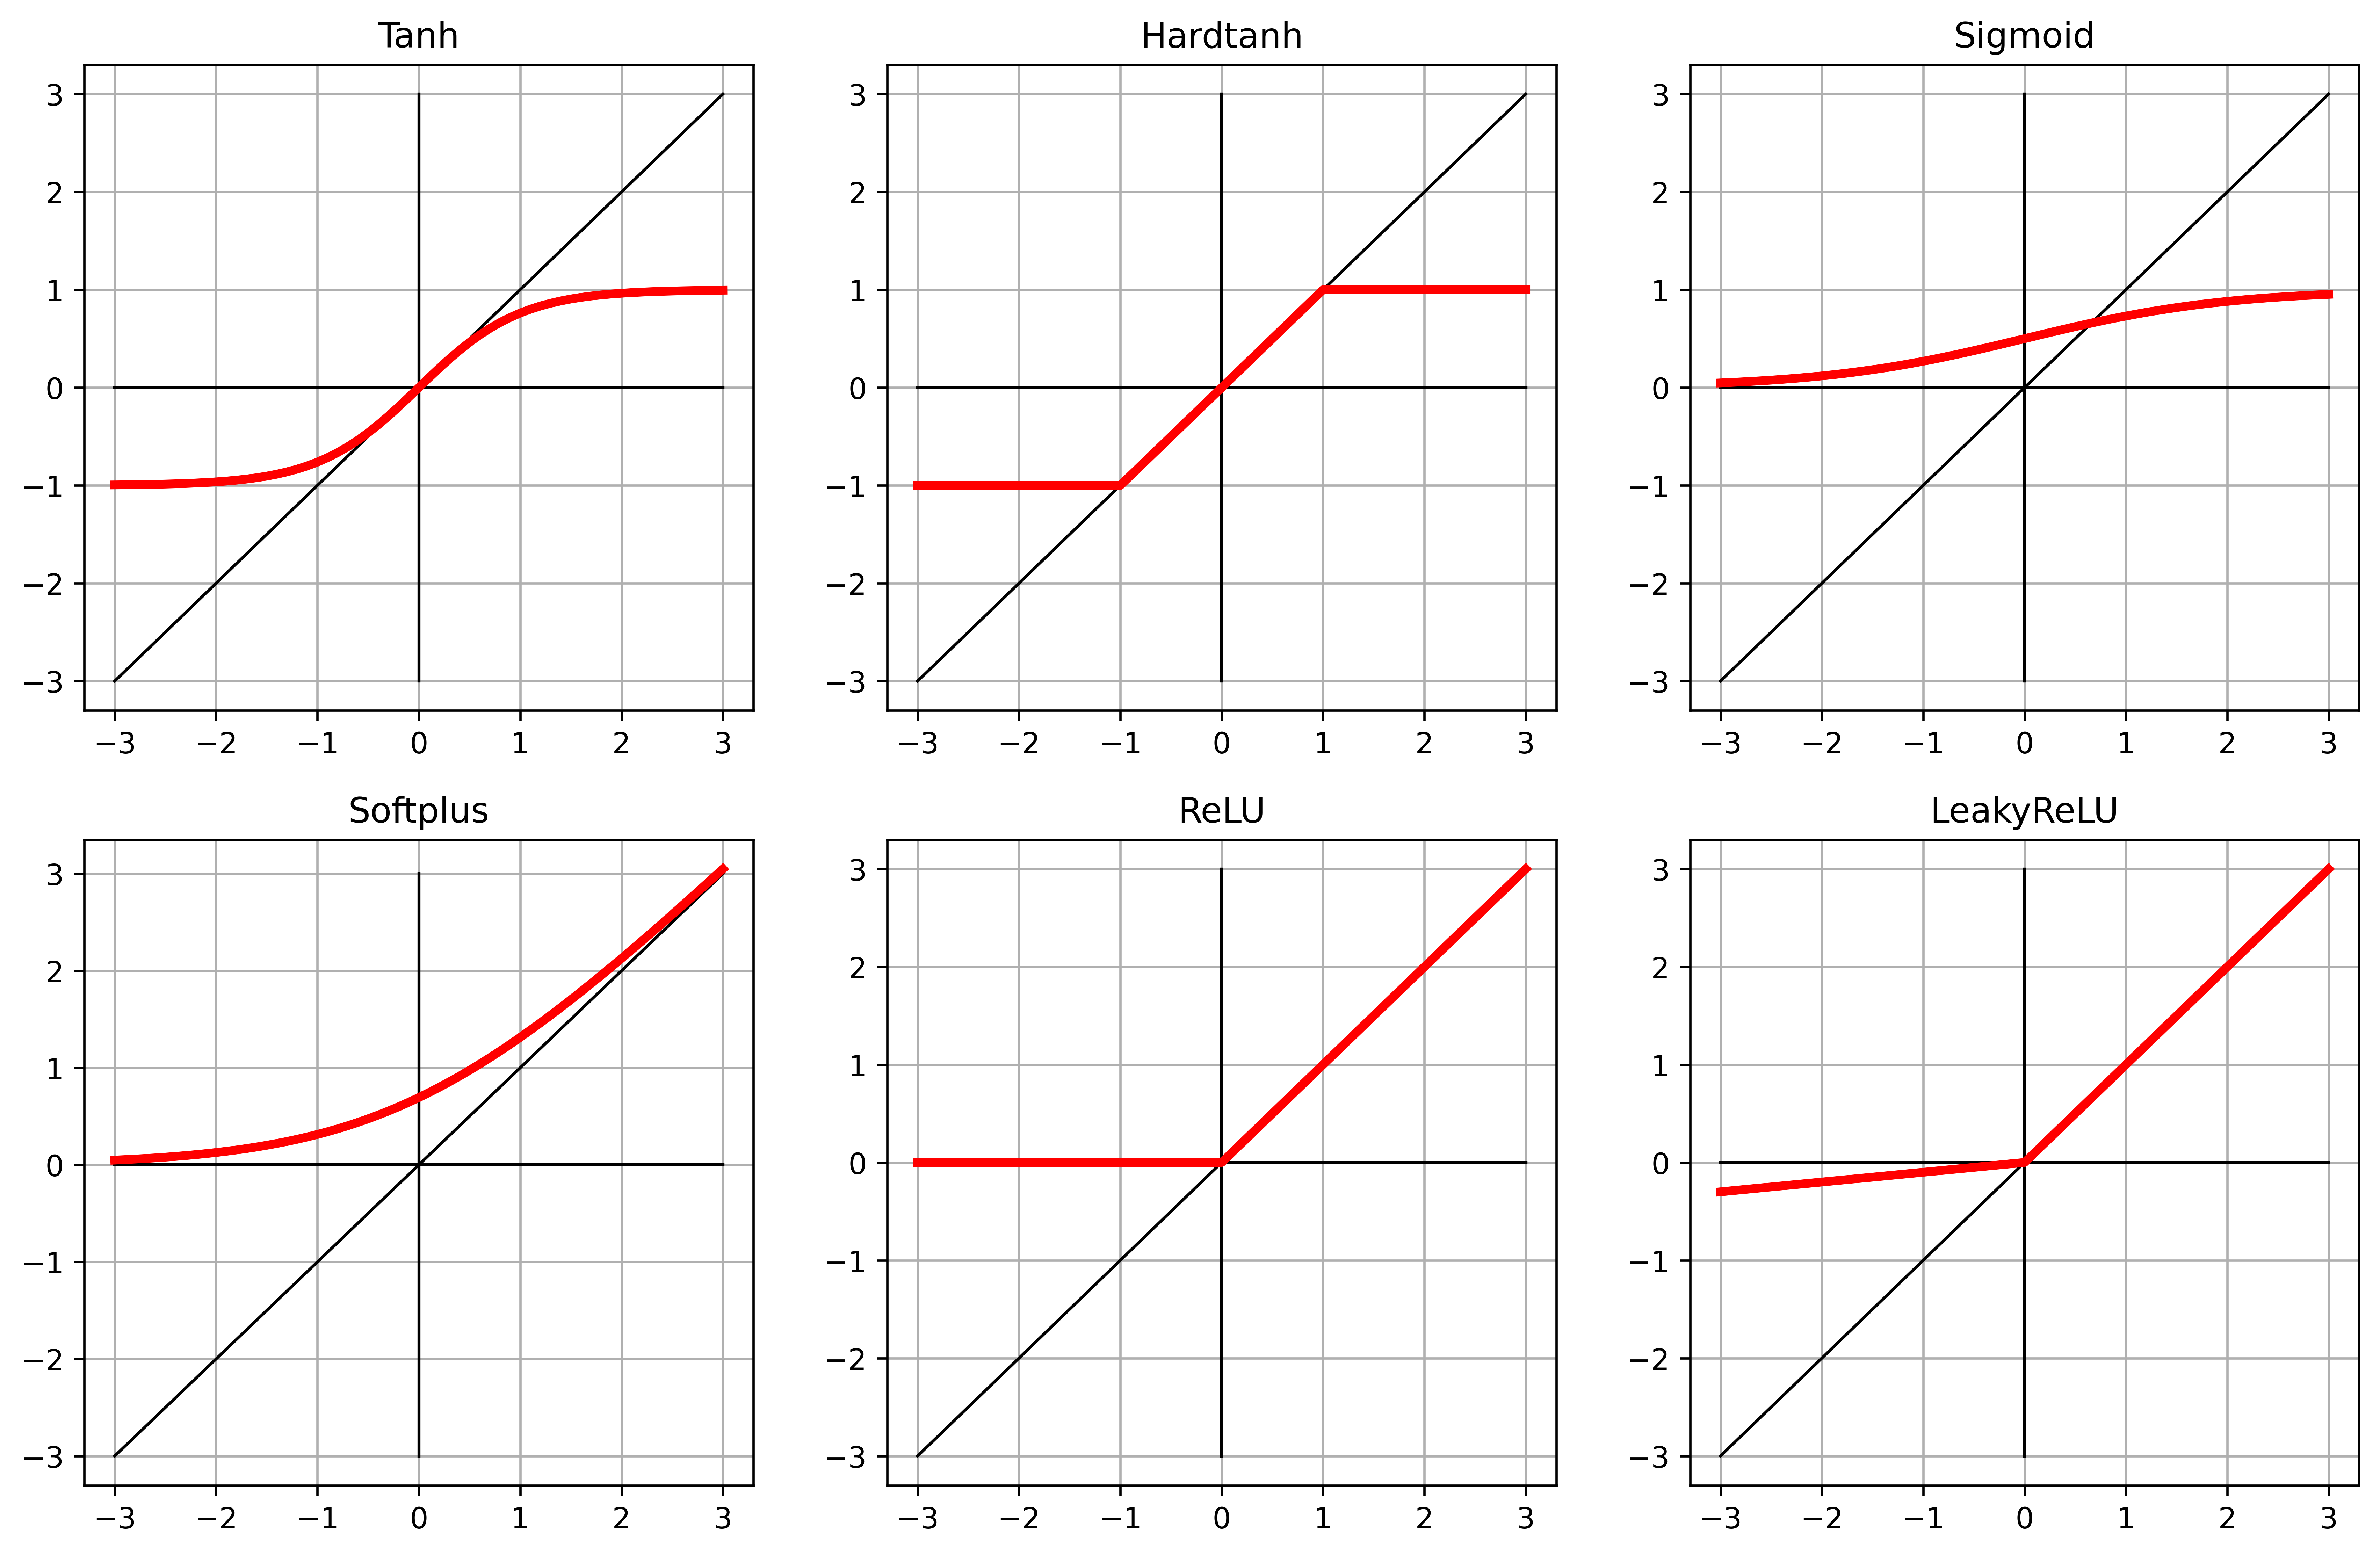

In [8]:
activation_list = [
    nn.Tanh(),
    nn.Hardtanh(),
    nn.Sigmoid(),
    nn.Softplus(),
    nn.ReLU(),
    nn.LeakyReLU(negative_slope=0.1),
]
fig = plt.figure(figsize=(14, 28), dpi=600)
for i, activation_func in enumerate(activation_list):
    subplot = fig.add_subplot(len(activation_list), 3, i + 1)
    subplot.set_title(type(activation_func).__name__)

    output_t = activation_func(input_t)

    plt.grid()
    plt.plot(input_t.numpy(), input_t.numpy(), "k", linewidth=1)
    plt.plot([-3, 3], [0, 0], "k", linewidth=1)
    plt.plot([0, 0], [-3, 3], "k", linewidth=1)
    plt.plot(input_t.numpy(), output_t.numpy(), "r", linewidth=3)

output_t

tensor([1.6885, 1.6924, 1.6967, 1.7015, 1.7064, 1.7112, 1.7155, 1.7184, 1.7190,
        1.7158, 1.7069, 1.6901, 1.6629, 1.6229, 1.5685, 1.5005, 1.4238, 1.3486,
        1.2913, 1.2713, 1.3060, 1.4017, 1.5384, 1.6643, 1.7191, 1.6667, 1.5191,
        1.3410, 1.2022, 1.1303, 1.1191, 1.1508, 1.2075, 1.2744, 1.3414, 1.4024,
        1.4547, 1.4979, 1.5328, 1.5605, 1.5824, 1.5997, 1.6132, 1.6239, 1.6324,
        1.6391, 1.6444, 1.6487, 1.6521, 1.6549, 1.6571, 1.6589, 1.6604, 1.6615,
        1.6625, 1.6633, 1.6639, 1.6644, 1.6649, 1.6652, 1.6655])

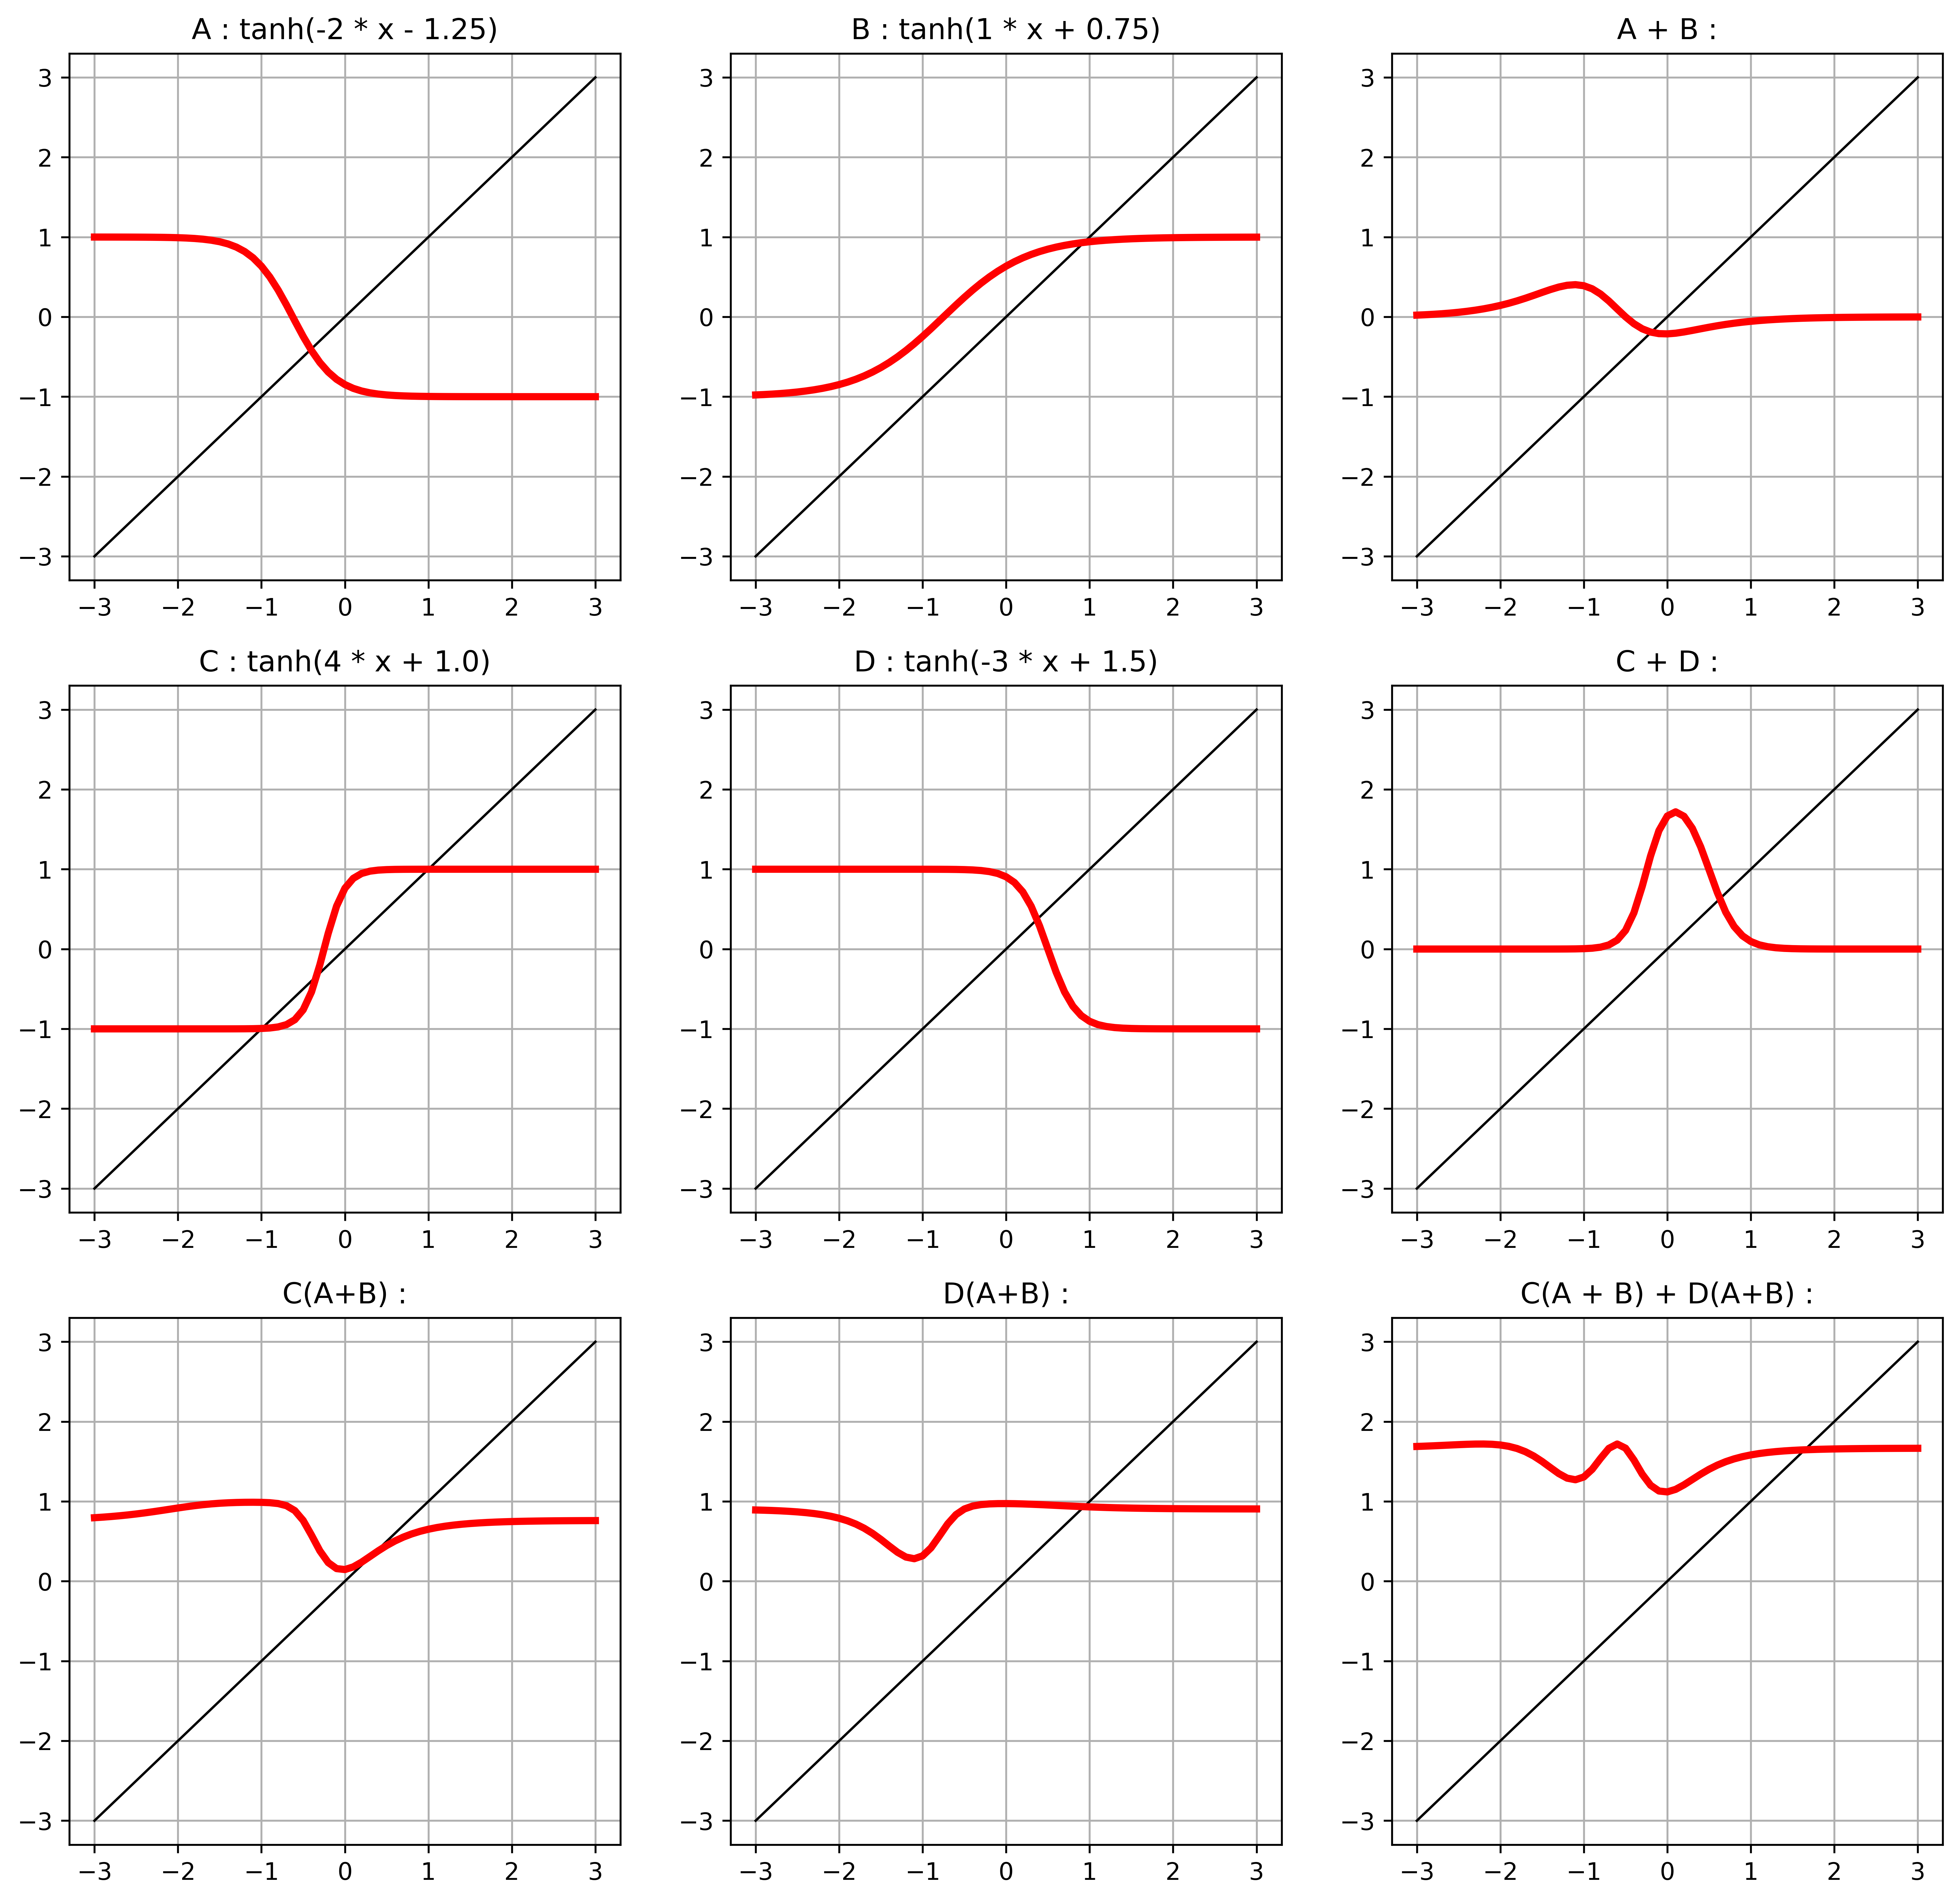

In [12]:
a = lambda x: nn.Tanh()(-2 * x - 1.25)
b = lambda x: nn.Tanh()(1 * x + 0.75)
c = lambda x: nn.Tanh()(4 * x + 1.0)
d = lambda x: nn.Tanh()(-3 * x + 1.5)

wd_list = [
    ("A : tanh(-2 * x - 1.25)", a(input_t)),
    ("B : tanh(1 * x + 0.75)", b(input_t)),
    ("A + B :", a(input_t) + b(input_t)),
    ("C : tanh(4 * x + 1.0)", c(input_t)),
    ("D : tanh(-3 * x + 1.5)", d(input_t)),
    ("C + D :", c(input_t) + d(input_t)),
    ("C(A+B) :", c(a(input_t) + b(input_t))),
    ("D(A+B) :", d(a(input_t) + b(input_t))),
    ("C(A + B) + D(A+B) :", c(a(input_t) + b(input_t)) + d(a(input_t) + b(input_t))),
]

fig = plt.figure(figsize=(14, 42), dpi=600)

for i, (title_str, output_t) in enumerate(wd_list):
    subplot = fig.add_subplot(len(wd_list), 3, i + 1)
    subplot.set_title(title_str)
    # output_t = activation_func(input_t)
    plt.grid()
    plt.plot(input_t.numpy(), input_t.numpy(), "k", linewidth=1)
    plt.plot(input_t.numpy(), output_t.numpy(), "r", linewidth=3)
output_t

tensor([-9.9505e-01, -9.9396e-01, -9.9263e-01, -9.9101e-01, -9.8903e-01,
        -9.8661e-01, -9.8367e-01, -9.8010e-01, -9.7574e-01, -9.7045e-01,
        -9.6403e-01, -9.5624e-01, -9.4681e-01, -9.3541e-01, -9.2167e-01,
        -9.0515e-01, -8.8535e-01, -8.6172e-01, -8.3365e-01, -8.0050e-01,
        -7.6159e-01, -7.1630e-01, -6.6404e-01, -6.0437e-01, -5.3705e-01,
        -4.6212e-01, -3.7995e-01, -2.9131e-01, -1.9738e-01, -9.9668e-02,
        -2.3842e-08,  9.9668e-02,  1.9738e-01,  2.9131e-01,  3.7995e-01,
         4.6212e-01,  5.3705e-01,  6.0437e-01,  6.6404e-01,  7.1630e-01,
         7.6159e-01,  8.0050e-01,  8.3365e-01,  8.6172e-01,  8.8535e-01,
         9.0515e-01,  9.2167e-01,  9.3541e-01,  9.4681e-01,  9.5624e-01,
         9.6403e-01,  9.7045e-01,  9.7574e-01,  9.8010e-01,  9.8367e-01,
         9.8661e-01,  9.8903e-01,  9.9101e-01,  9.9263e-01,  9.9396e-01,
         9.9505e-01])

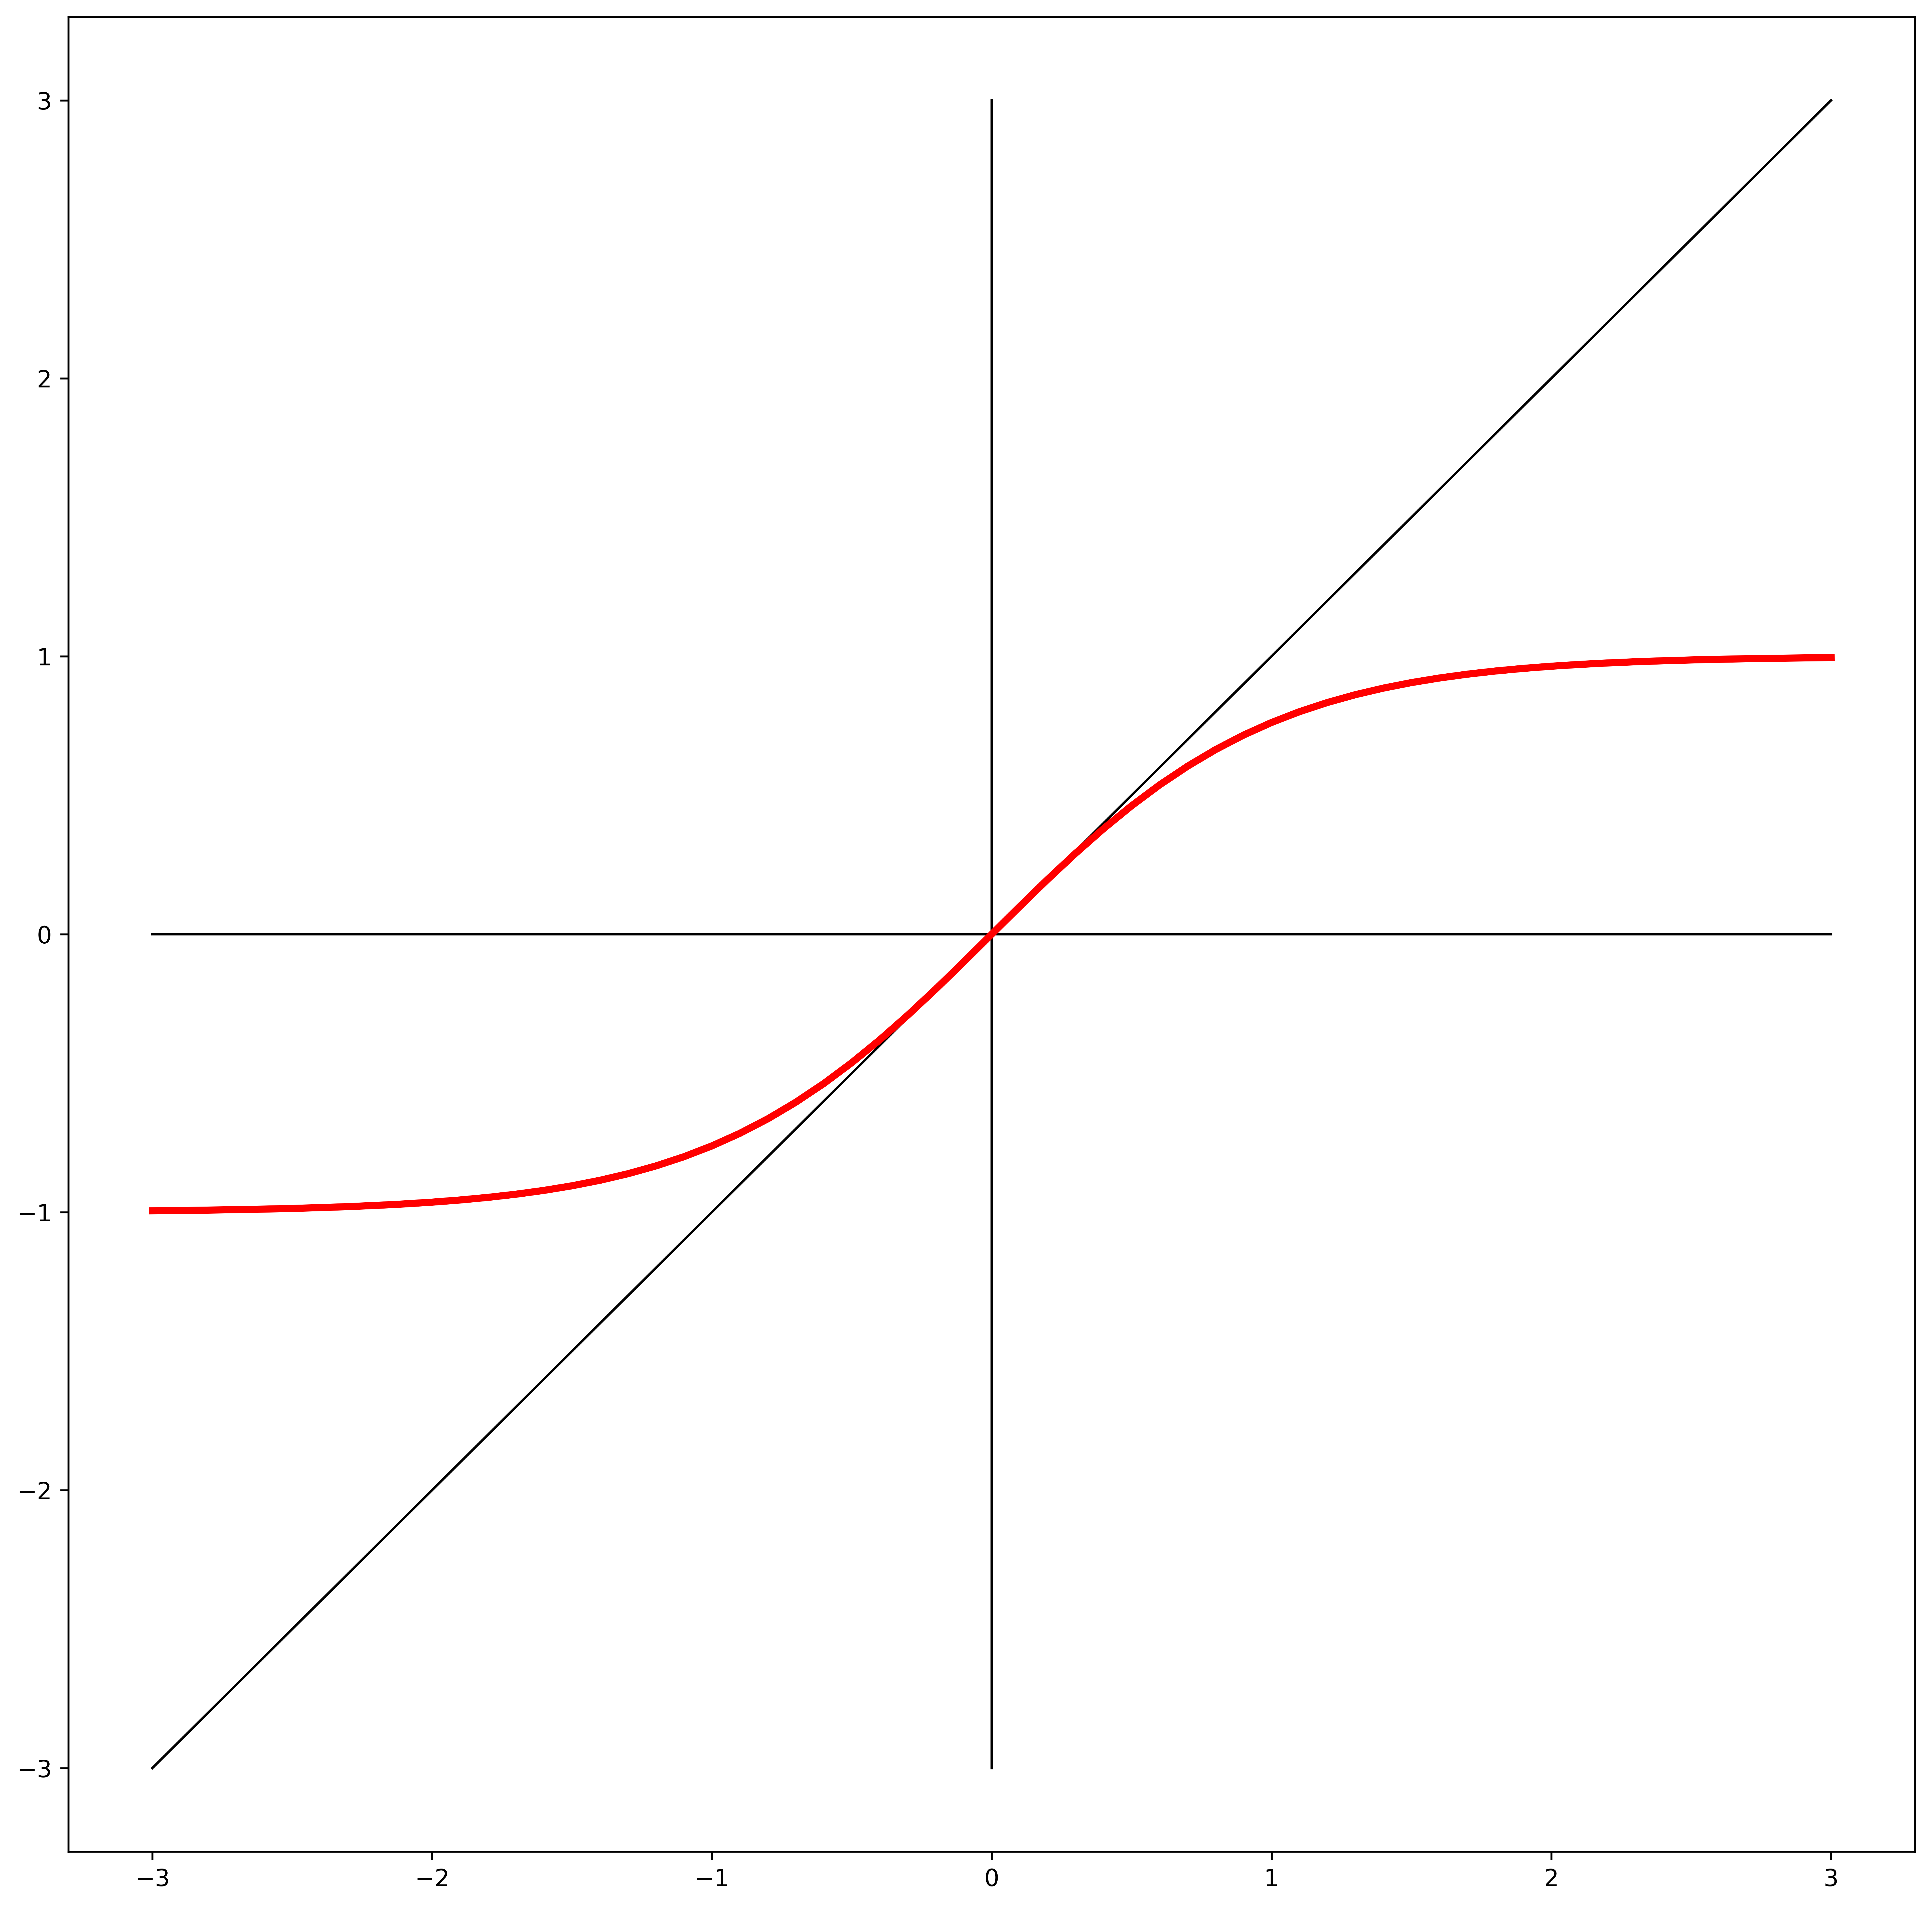

In [13]:
fig = plt.figure(figsize=(14, 14), dpi=600)

subplot = fig.add_subplot(1, 1, 1)
# subplot.set_title(type(activation_func).__name__)

output_t = nn.Tanh()(input_t)

# plt.grid()
plt.plot(input_t.numpy(), input_t.numpy(), "k", linewidth=1)
plt.plot([-3, 3], [0, 0], "k", linewidth=1)
plt.plot([0, 0], [-3, 3], "k", linewidth=1)
plt.plot(input_t.numpy(), output_t.numpy(), "r", linewidth=3)

output_t